# Biztools usage on sample sales data

The script uses a variety of powerful analytical tools to dig deep into sales data, uncovering important trends and patterns. It looks at sales variations across different years and quarters, using dynamic aggregations and rolling windows to make the calculations more efficient. The script also breaks down delivery statuses and revenue growth, providing valuable insights into the performance of orders. By applying combinatorial analysis, it identifies the top-selling products that contribute the most to overall sales. Date utilities help adjust timelines and improve scheduling, while financial simulations estimate future profit margins based on past revenue trends. Overall, this analysis helps businesses make smarter, data-driven decisions and spot key performance metrics with clarity.

## Imported require Libraries

In [114]:

import sys
import os
current_directory = os.getcwd()
main_directory_path = os.path.abspath(os.path.join(current_directory, '..'))
sys.path.insert(0, main_directory_path)

import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from stream_aggregations import  StreamAggregations
from iterable_statistics import IterableStatistics
from lazy_rolling_window import LazyRollingWindow
from combinatorial_analytics import CombinatorialAnalytics
from iterator_date_utils import IteratorDateUtils
from stream_kpi_calculations import StreamKpiCalculations
from financial_simulation import FinancialSimulation


## Imported sample csv sales data

In [99]:
sales = pd.read_csv('sales_data.csv', encoding='ISO-8859-1')
sales

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [100]:
sales.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

## 1. Stream Aggregations

This class performs aggregations on streaming data, such as calculating the minimum and maximum sales for each combination of year, quarter, and deal size. It helps to quickly identify trends and ranges in the data.

In [101]:
# Initialize and perform aggregations
aggregations = StreamAggregations()

min_max = aggregations.stream_group_min_max(sales, ["YEAR_ID", "QTR_ID", "DEALSIZE",], "SALES")
min_max

,YEAR_ID,QTR_ID,DEALSIZE,min,max
0,2003,1,Large,7208.00,8690.36
1,2003,1,Medium,3036.60,6341.21
2,2003,1,Small,710.20,2949.12
3,2003,2,Large,7083.00,11279.20
4,2003,2,Medium,3027.84,6916.12
5,2003,2,Small,721.44,2993.50
6,2003,3,Large,7023.98,10993.50
7,2003,3,Medium,3003.00,6467.02
8,2003,3,Small,717.40,2919.58
9,2003,4,Large,7060.24,9064.89


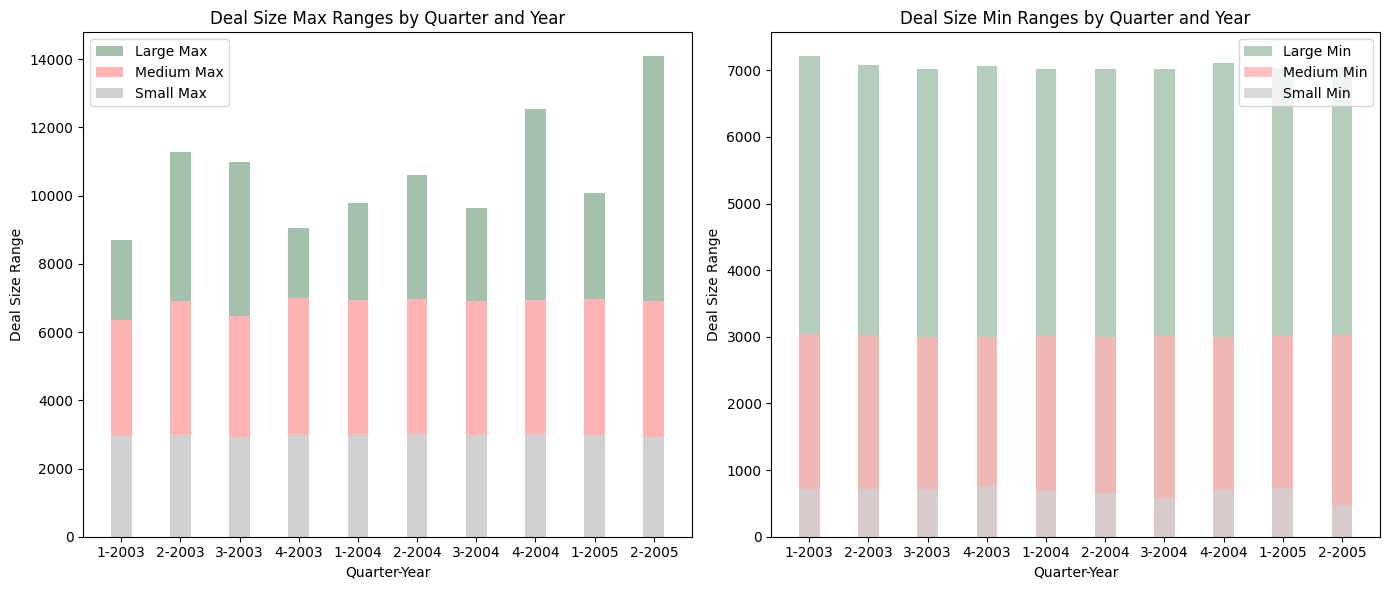

In [102]:
# Create a new column for 'QTR-YEAR' format
min_max['QTR_YEAR'] = min_max['QTR_ID'].astype(str) + '-' + min_max['YEAR_ID'].astype(str)

colors = {'Large': '#A3C1AD', 'Medium': '#FFB3B3', 'Small': '#D1D1D1'}

bar_width = 0.35

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Loop through each deal size and plot the corresponding min and max values
for idx, size in enumerate(['Large', 'Medium', 'Small']):
    subset = min_max[min_max['DEALSIZE'] == size]

    # Offset for x-position to avoid overlapping
    offset = idx * bar_width

    # Plotting max values on the first subplot (ax1)
    ax1.bar(subset['QTR_YEAR'], subset['max'], color=colors[size], alpha=1,
            label=f'{size} Max', width=bar_width, align='center')
    
    # Plotting min values on the second subplot (ax2)
    ax2.bar(subset['QTR_YEAR'], subset['min'], color=colors[size], alpha=0.8,
            label=f'{size} Min', width=bar_width, align='center')

# Labeling for the first plot (Max)
ax1.set_xlabel('Quarter-Year')
ax1.set_ylabel('Deal Size Range')
ax1.set_title('Deal Size Max Ranges by Quarter and Year')
ax1.legend()

# Labeling for the second plot (Min)
ax2.set_xlabel('Quarter-Year')
ax2.set_ylabel('Deal Size Range')
ax2.set_title('Deal Size Min Ranges by Quarter and Year')
ax2.legend()

plt.tight_layout()
plt.show()

## 2. Iterable Statistics

This class calculates various statistics over iterable datasets. In the script, it counts the occurrences of specific delivery statuses ("Shipped" and "Resolved") in the sales data and computes the sum and mean of revenue growth.

In [103]:
sales.STATUS.unique()

array(['Shipped', 'Disputed', 'In Process', 'Cancelled', 'On Hold',
       'Resolved'], dtype=object)

In [ ]:
count_shipped  = IterableStatistics.iterable_count(list(sales["STATUS"][sales["STATUS"] == "Shipped"]))
count_resolved  = IterableStatistics.iterable_count(list(sales["STATUS"][sales["STATUS"] == "Resolved"]))

print("Deliveries Shipped:", count_shipped) 
print("Deliveries Resolved:", count_resolved) 

Deliveries Shipped: 2617
Deliveries Resolved: 47


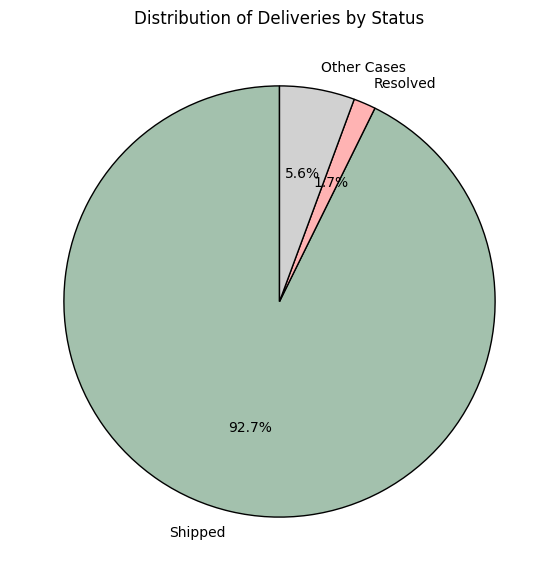

In [ ]:
total_cases = len(sales)

# Other cases: Total cases minus the sum of "Shipped" and "Resolved"
other_cases = total_cases - (count_shipped + count_resolved)

colors = ['#A3C1AD', '#FFB3B3', '#D1D1D1']  # Pastel green, pink, and gray
labels = ['Shipped', 'Resolved', 'Other Cases']
sizes = [count_shipped, count_resolved, other_cases]

# The pie chart with mellow colors
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})

# Title
plt.title('Distribution of Deliveries by Status')

# Display the pie chart
plt.show()


## 3. Lazy Rolling Window

This class allows for efficient rolling-window calculations over large datasets. It computes the average sales for the first 500 records, detects outliers in the data, and recalculates the average after removing these outliers, helping to smoothen out any anomalies in the data.

In [ ]:
# Initialize the LazyRollingWindow with data and window size of 500
rolling_window = LazyRollingWindow(sales["SALES"], window_size=500)

# Initial average sales for the first year
initial_avg = rolling_window.get_window_avg()
print("Average sales in first 500:", initial_avg)

# Detect and print outliers in the first window of 500 values
outliers = rolling_window.detect_outliers()
print("Detected outliers:", outliers)

# Remove the detected outliers from the first 500 values
sales_no_outliers = sales["SALES"][:500].copy()  # Copy the first 500 values
for outlier in outliers:
    sales_no_outliers = sales_no_outliers[sales_no_outliers != outlier]  # Remove outliers

# Calculate the new average sales after removing the outliers
new_avg = sales_no_outliers.mean()
print("Average sales after removing outliers:", new_avg)


Average sales in first 500: 4740.115319999998
Detected outliers: [10993.5, 10172.7, 11623.7, 12001.0, 11886.6, 11279.2, 10606.2]
Average sales after removing outliers: 4648.062393509128


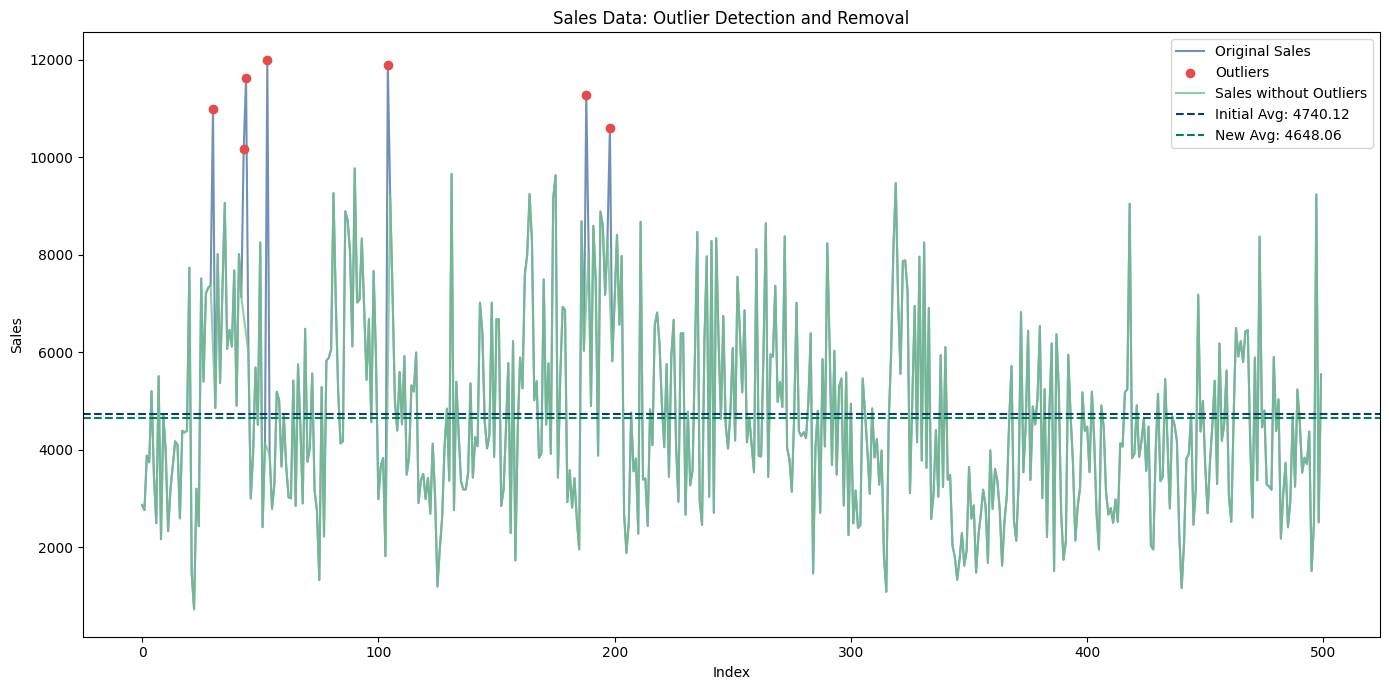

In [ ]:
# Plot the original sales data (first 500 values)
plt.figure(figsize=(14, 7))

# Using a mellow blue for the original sales data
plt.plot(sales["SALES"][:500], label='Original Sales', color='#4C75A3', alpha=0.8)

# Highlight the outliers
outliers = rolling_window.detect_outliers()
outliers_x = [i for i in range(500) if sales["SALES"][i] in outliers]
outliers_y = [sales["SALES"][i] for i in range(500) if sales["SALES"][i] in outliers]

plt.scatter(outliers_x, outliers_y, color='#E44C4C', label='Outliers', zorder=5)

# Plot the sales data after removing outliers
sales_no_outliers = sales["SALES"][:500].copy()  # Copy the first 500 values
for outlier in outliers:
    sales_no_outliers = sales_no_outliers[sales_no_outliers != outlier]  # Remove outliers

plt.plot(sales_no_outliers.index, sales_no_outliers, label='Sales without Outliers', color='#75C28E', alpha=0.8)

# Add average lines for comparison
initial_avg = rolling_window.get_window_avg()
new_avg = sales_no_outliers.mean()

plt.axhline(y=initial_avg, color='#0d3b66', linestyle='--', label=f'Initial Avg: {initial_avg:.2f}')
plt.axhline(y=new_avg, color='#007f5f', linestyle='--', label=f'New Avg: {new_avg:.2f}')

# Labels and legend
plt.xlabel('Index')
plt.ylabel('Sales')
plt.title('Sales Data: Outlier Detection and Removal')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


## 4. Combinatrics Analytics

This class performs combinatorial analysis, such as Pareto analysis, to identify the top-performing items. In the script, it analyzes sales data to find the top 1% contributing products based on their sales, allowing for better prioritization of high-value items.

In [108]:
# Ensure 'sales' is a DataFrame
assert isinstance(sales, pd.DataFrame), "sales should be a DataFrame"

# Verify column names
required_columns = ['SALES', 'ORDERNUMBER', 'ORDERDATE']
for col in required_columns:
    if col not in sales.columns:
        raise ValueError(f"Missing required column: {col}")

# Create an instance of CombinatorialAnalytics with the 'SALES' data
analytics = CombinatorialAnalytics(list(sales['SALES']))

# Perform Pareto analysis to find the top 1% contributing products based on sales
top_contributors = analytics.pareto_analysis(list(sales['SALES']), list(sales['ORDERNUMBER']), top_percentage=1)

# Print the top contributors with their order number and order date
print(f"Top contributing products (based on Pareto analysis):")
for product_sales, order_number in top_contributors:
    # Find the corresponding order date using the order number
    order_date = sales.loc[sales['ORDERNUMBER'] == order_number, 'ORDERDATE'].values[0]
    print(f"Order Number: {order_number}, Sales: {product_sales}, Order Date: {order_date}")


Top contributing products (based on Pareto analysis):
Order Number: 10407, Sales: 14082.8, Order Date: 4/22/2005 0:00
Order Number: 10322, Sales: 12536.5, Order Date: 11/4/2004 0:00
Order Number: 10424, Sales: 12001.0, Order Date: 5/31/2005 0:00
Order Number: 10412, Sales: 11887.8, Order Date: 5/3/2005 0:00
Order Number: 10403, Sales: 11886.6, Order Date: 4/8/2005 0:00
Order Number: 10405, Sales: 11739.7, Order Date: 4/14/2005 0:00
Order Number: 10312, Sales: 11623.7, Order Date: 10/21/2004 0:00
Order Number: 10333, Sales: 11336.7, Order Date: 11/18/2004 0:00
Order Number: 10127, Sales: 11279.2, Order Date: 6/3/2003 0:00


## 5. Date Utils

This class provides date manipulation utilities. In the script, it calculates the next working day based on the order date, helping to adjust timelines and ensure that activities like deliveries are scheduled correctly according to business days.

In [ ]:
# Get next working day from the date on which order has been placed
next_working_day = IteratorDateUtils.iter_next_working_day(sales, date_column="ORDERDATE", new_col_name="NEXTWORKINGDATE")

# Print the result dataframe with next working day column
next_working_day[['ORDERNUMBER', 'ORDERDATE', 'NEXTWORKINGDATE']].head()

,ORDERNUMBER,ORDERDATE,NEXTWORKINGDATE
0,10107,2/24/2003 0:00,2003-02-25
1,10121,5/7/2003 0:00,2003-05-08
2,10134,7/1/2003 0:00,2003-07-02
3,10145,8/25/2003 0:00,2003-08-26
4,10159,10/10/2003 0:00,2003-10-13


## 6. Stream KPI Calculations

This class calculates key performance indicators (KPIs) for streaming data, such as revenue growth. It aggregates sales data by date to calculate daily revenue and computes the overall revenue growth, providing insights into financial performance over time.

In [ ]:
# Calculate the total cost for each order
sales['ORDERDATE'] = pd.to_datetime(sales['ORDERDATE'])
sales['TOTALCOST'] = sales['QUANTITYORDERED'] * sales['PRICEEACH']
daily_sales = sales.groupby('ORDERDATE', as_index=False)['TOTALCOST'].sum()
daily_sales = daily_sales.sort_values(by='ORDERDATE')

# Calculate the stream revenue
total_revenue = StreamKpiCalculations.stream_revenue_growth(daily_sales, revenue_col="TOTALCOST", new_col_name='REVENUEGROWTH')
total_revenue[['ORDERDATE', 'TOTALCOST', 'REVENUEGROWTH']].head()

,ORDERDATE,TOTALCOST,REVENUEGROWTH
0,2003-01-06,9982.25,NaN
1,2003-01-09,8976.96,-10.07
2,2003-01-10,5955.74,-33.66
3,2003-01-29,47886.21,704.03
4,2003-01-31,35084.80,-26.73


C:\Users\Usashi Roy\AppData\Local\Temp\ipykernel_20792\3061558355.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = daily_sales.set_index('ORDERDATE').resample('M').mean()
C:\Users\Usashi Roy\AppData\Local\Temp\ipykernel_20792\3061558355.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data['REVENUEGROWTH'] = total_revenue.set_index('ORDERDATE')['REVENUEGROWTH'].resample('M').mean()


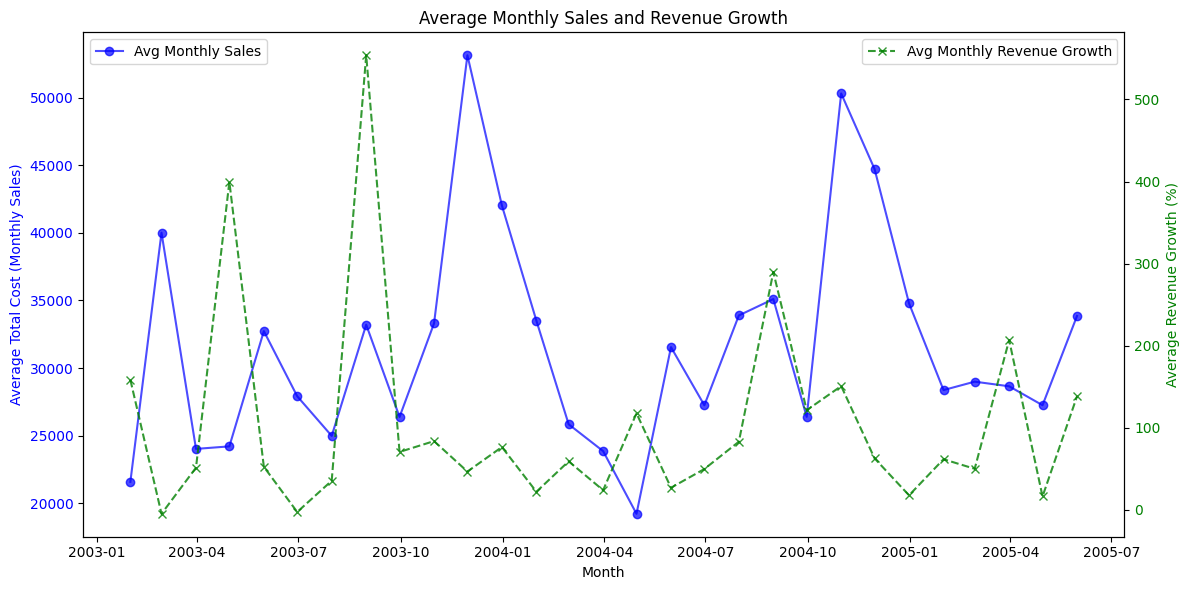

In [111]:
# Aggregate data to monthly averages
monthly_data = daily_sales.set_index('ORDERDATE').resample('M').mean()
monthly_data['REVENUEGROWTH'] = total_revenue.set_index('ORDERDATE')['REVENUEGROWTH'].resample('M').mean()

# Prepare the data for visualization
months = monthly_data.index
avg_total_cost = monthly_data['TOTALCOST']
avg_revenue_growth = monthly_data['REVENUEGROWTH']

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Average Monthly Total Cost on the first axis
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Total Cost (Monthly Sales)', color='blue')
ax1.plot(months, avg_total_cost, color='blue', label='Avg Monthly Sales', marker='o', alpha=0.7)
ax1.tick_params(axis='y', labelcolor='blue')

# Create a twin axis for average monthly revenue growth
ax2 = ax1.twinx()
ax2.set_ylabel('Average Revenue Growth (%)', color='green')
ax2.plot(months, avg_revenue_growth, color='green', label='Avg Monthly Revenue Growth', linestyle='--', marker='x', alpha=0.8)
ax2.tick_params(axis='y', labelcolor='green')

# Title and layout adjustments
plt.title('Average Monthly Sales and Revenue Growth')
fig.tight_layout()

# Add legends for better readability
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

The graph reveals a noticeable revenue hike around May and October each year, with marked increases in Revenue Growth during these months.

## 7. Financial Simulation

This class simulates financial metrics, such as profit margins, based on revenue data. It calculates the profit margin for a given year (in this case, based on the average revenue of 2003 and 2004) by applying a predefined profit margin percentage, helping to forecast future profitability.

In [112]:
# Ensure the ORDERDATE column is in datetime format
total_revenue["ORDERDATE"] = pd.to_datetime(total_revenue["ORDERDATE"], errors='coerce')

# Filter REVENUEGROWTH based on the year of ORDERDATE being "Shipped"
rev_03 = list(total_revenue.loc[total_revenue["ORDERDATE"].dt.year == 2003, "REVENUEGROWTH"])
rev_04 = list(total_revenue.loc[total_revenue["ORDERDATE"].dt.year == 2004, "REVENUEGROWTH"])


In [113]:
revenue_growth_03 = [x for x in rev_03 if not pd.isna(x)]
revenue_growth_04 = [x for x in rev_04 if not pd.isna(x)]

total_sum_revenue_03 = IterableStatistics.iterable_sum(revenue_growth_03)
total_sum_revenue_04 = IterableStatistics.iterable_sum(revenue_growth_04)
print(f"Total Revenue of 2003: {total_sum_revenue_03} USD")
print(f"Total Revenue of 2004: {total_sum_revenue_04} USD")

avg_revenue_2yrs, med_revenue_2yrs = IterableStatistics.iterable_mean_median([total_sum_revenue_03,total_sum_revenue_04])
print(f"The average Revenue basis 2 years is {avg_revenue_2yrs}")

# Simulate profit margin
profit = FinancialSimulation.simulate_profit_margin(
    revenue=avg_revenue_2yrs, profit_margin_percentage=0.2
)
print(f"Simulation of profit margin 2005 as per the average revenue of 2003 and 2004 is {profit} USD")

Total Revenue of 2003: 9819.75 USD
Total Revenue of 2004: 10462.900000000003 USD
The average Revenue basis 2 years is 10141.325
Simulation of profit margin 2005 as per the average revenue of 2003 and 2004 is 2028.2650000000003 USD
